# Ishaan Solanki

## Research question/interests

**My interest in finding out who are the top 4 best batsmen in the IPL ever. In order to achieve this, I will analyze their performance  across their entire careers, taking into account the statistics provided by our data sources for both regular season and playoffs, giving more importance in the latter.**

In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
import pandas as pd
ball_by_ball = pd.read_csv("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [145]:
import pandas as pd
matches = pd.read_csv("../data/raw/IPL_Matches_2008_2022 (1).csv")
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


## EXPLORATORY DATA ANALYSIS 

In [146]:
batsman_group = ball_by_ball.groupby('batter')
matches = batsman_group['ID'].nunique()
total_runs = batsman_group['batsman_run'].sum()
total_balls_faced = batsman_group['ballnumber'].count()
Wickets = batsman_group['isWicketDelivery'].sum()
batsman_stats = pd.concat([matches,total_runs, total_balls_faced,Wickets], axis=1)
new_column_names = {'ID':'Matches','batsman_run': 'Total Runs', 
                    'ballnumber': 'Balls Faced'
                   , 'isWicketDelivery': 'Wickets'}
batsman_stats = batsman_stats.rename(columns=new_column_names)
description = batsman_stats.describe(include='all')
batsman_stats = batsman_stats[batsman_stats['Total Runs'] >= 1000]
batsman_stats['Strike Rate'] = batsman_stats['Total Runs'] / batsman_stats['Balls Faced'] * 100
batsman_stats['Runs scored per wicket']= batsman_stats['Total Runs'] / batsman_stats['Wickets'] 
batsman_stats = batsman_stats.sort_values('Runs scored per wicket',ascending=False)
batsman_stats.head(10)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
KL Rahul,99,3895,2933,84,132.799182,46.369048
AB de Villiers,170,5181,3487,125,148.580442,41.448000
JP Duminy,75,2029,1680,49,120.773810,41.408163
DA Warner,162,5883,4313,143,136.401577,41.139860
LMP Simmons,29,1079,878,27,122.892938,39.962963
JC Buttler,81,2832,1955,71,144.859335,39.887324
ML Hayden,32,1107,839,28,131.942789,39.535714
CH Gayle,141,4997,3516,128,142.121729,39.039062
SE Marsh,69,2489,1913,65,130.109775,38.292308


**We have a new data frame that gives us the aggregate statistics of Batsmen and will be used to perform analysis**

In [147]:
export_path = '../data/processed/batsman_stats.csv'
batsman_stats.to_csv(export_path, index=True)

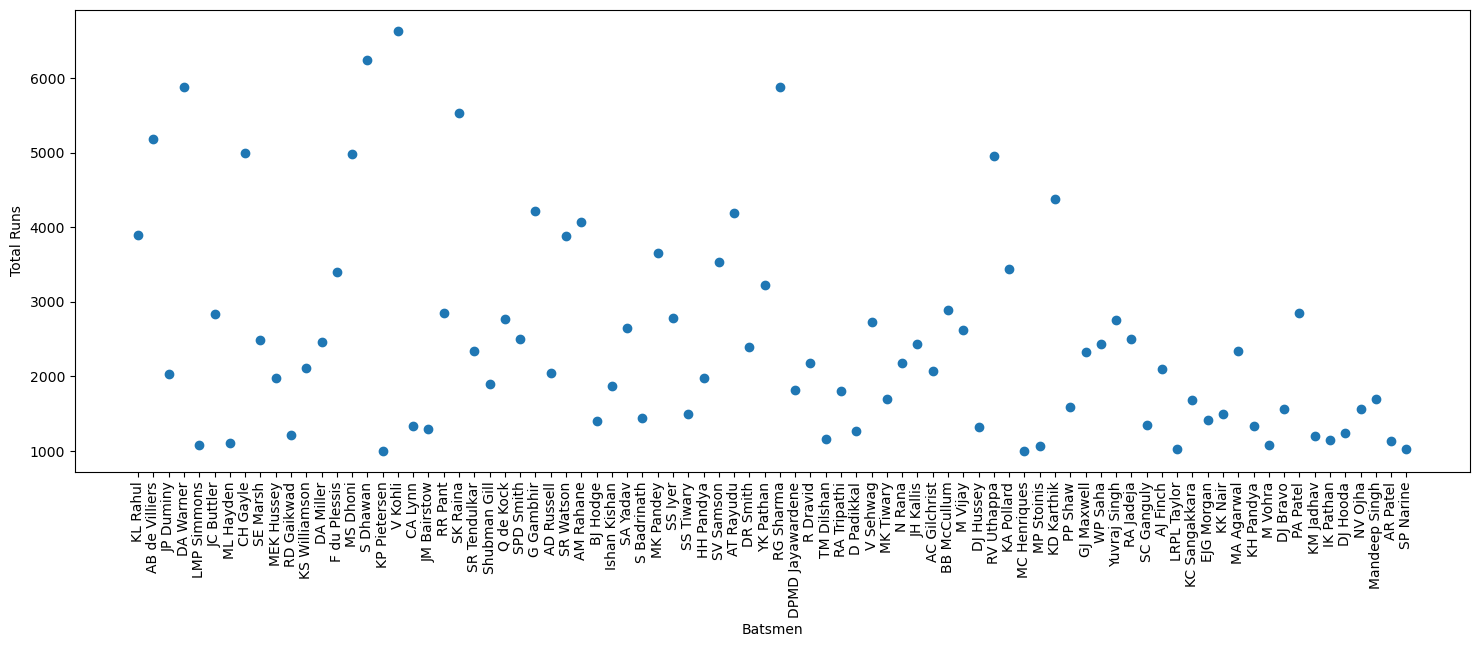

In [148]:
column_data = batsman_stats['Total Runs']
plt.scatter(column_data.index,column_data.values)
fig = plt.gcf() 
fig.set_size_inches(18, 6)
plt.xticks(rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.show()

**This shows us who has scored the most runs in ipl. Virat Kohli is top scorer of IPL. This should give us an idea of the batsmen that are in the top 4 all time discussion**

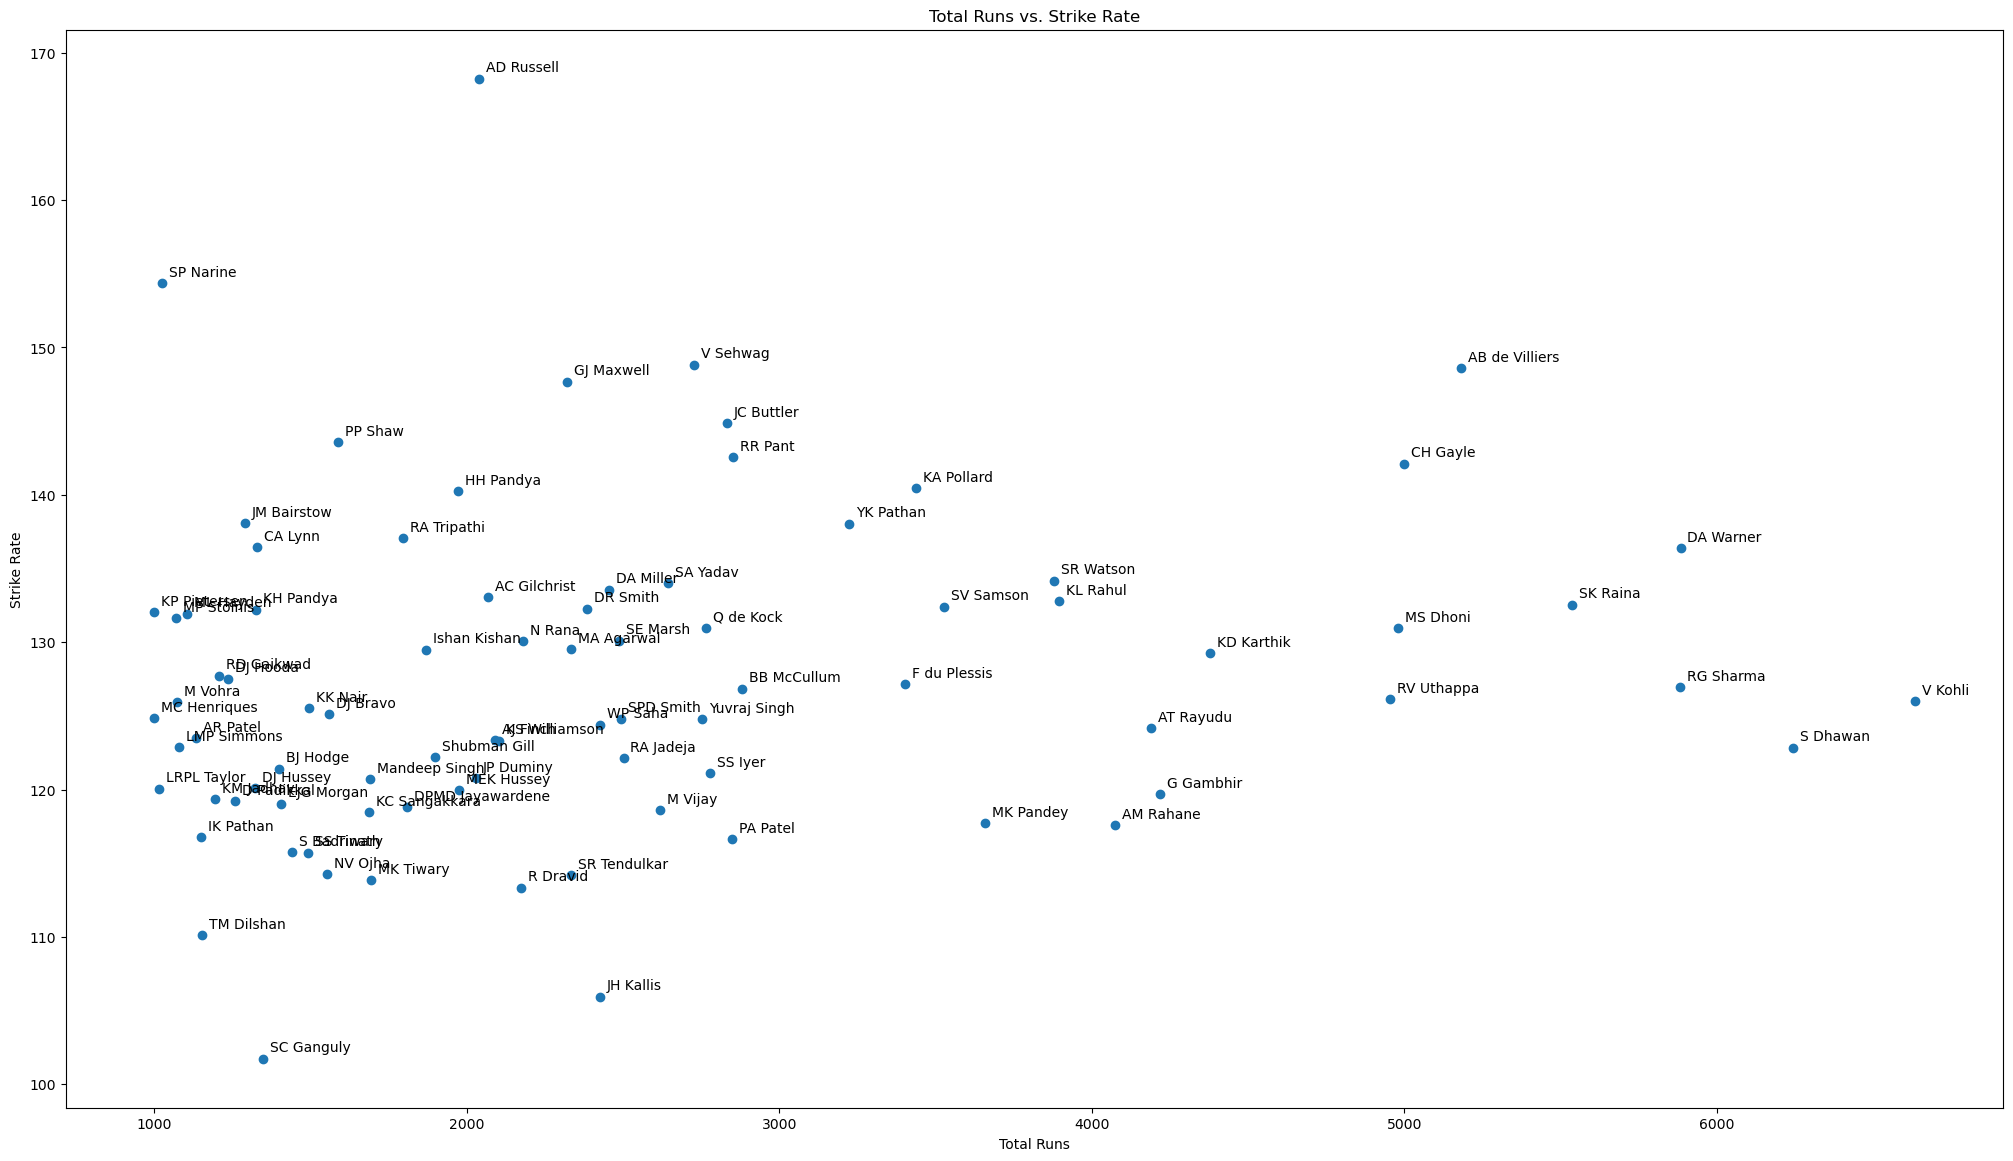

In [167]:
fig, ax = plt.subplots(figsize=(25, 14))
ax.scatter(batsman_stats['Total Runs'], batsman_stats['Strike Rate'])

for i, txt in enumerate(batsman_stats.index):
   ax.annotate(txt, (batsman_stats['Total Runs'].iloc[i], batsman_stats['Strike Rate'].iloc[i]), xytext=(5, 5), textcoords='offset points')
ax.set_xlabel('Total Runs')
ax.set_ylabel('Strike Rate')
ax.set_title('Total Runs vs. Strike Rate')
plt.show()


**This allows us to analyse strike rate with keeping total runs in mind. Although Sunil Narine has a very high strike he hasn't scored a lot runs so it isn't that impressive. However, AB de Villiers has a high strike and scored a lot of runs which establishes him as a top batsmen**

In [169]:
df2 = ball_by_ball[ball_by_ball['innings'] >1]
batsman_group1 = df2.groupby('batter')
matches1 = batsman_group1['ID'].nunique()
total_runs1 = batsman_group1['batsman_run'].sum()
total_balls_faced1 = batsman_group1['ballnumber'].count()
Wickets1 = batsman_group1['isWicketDelivery'].sum()
batsman_stats1 = pd.concat([matches1,total_runs1, total_balls_faced1,Wickets1], axis=1)
new_column_names1 = {'ID':'Matches','batsman_run': 'Total Runs', 
                    'ballnumber': 'Balls Faced'
                   , 'isWicketDelivery': 'Wickets'}
batsman_stats1 = batsman_stats1.rename(columns=new_column_names1)
description1 = batsman_stats1.describe(include='all')
batsman_stats1 = batsman_stats1[batsman_stats1['Total Runs'] >= 1000]
batsman_stats1['Strike Rate'] = batsman_stats1['Total Runs'] / batsman_stats1['Balls Faced'] * 100
batsman_stats1['Runs scored per wicket']= batsman_stats1['Total Runs'] / batsman_stats1['Wickets'] 
batsman_stats1 = batsman_stats1.sort_values('Runs scored per wicket',ascending=False)
batsman_stats1.head(10)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
KL Rahul,45,1961,1461,40,134.223135,49.025000
DA Miller,50,1444,1060,32,136.226415,45.125000
Shubman Gill,34,1012,822,24,123.114355,42.166667
DA Warner,83,2841,2057,69,138.113758,41.173913
JC Buttler,43,1437,924,36,155.519481,39.916667
S Dhawan,88,2707,2200,68,123.045455,39.808824
CH Gayle,66,2124,1557,55,136.416185,38.618182
SE Marsh,29,1072,793,28,135.182850,38.285714
KS Williamson,39,1080,928,29,116.379310,37.241379


**This dataframe contains statistics of player perfomance while chasing.**

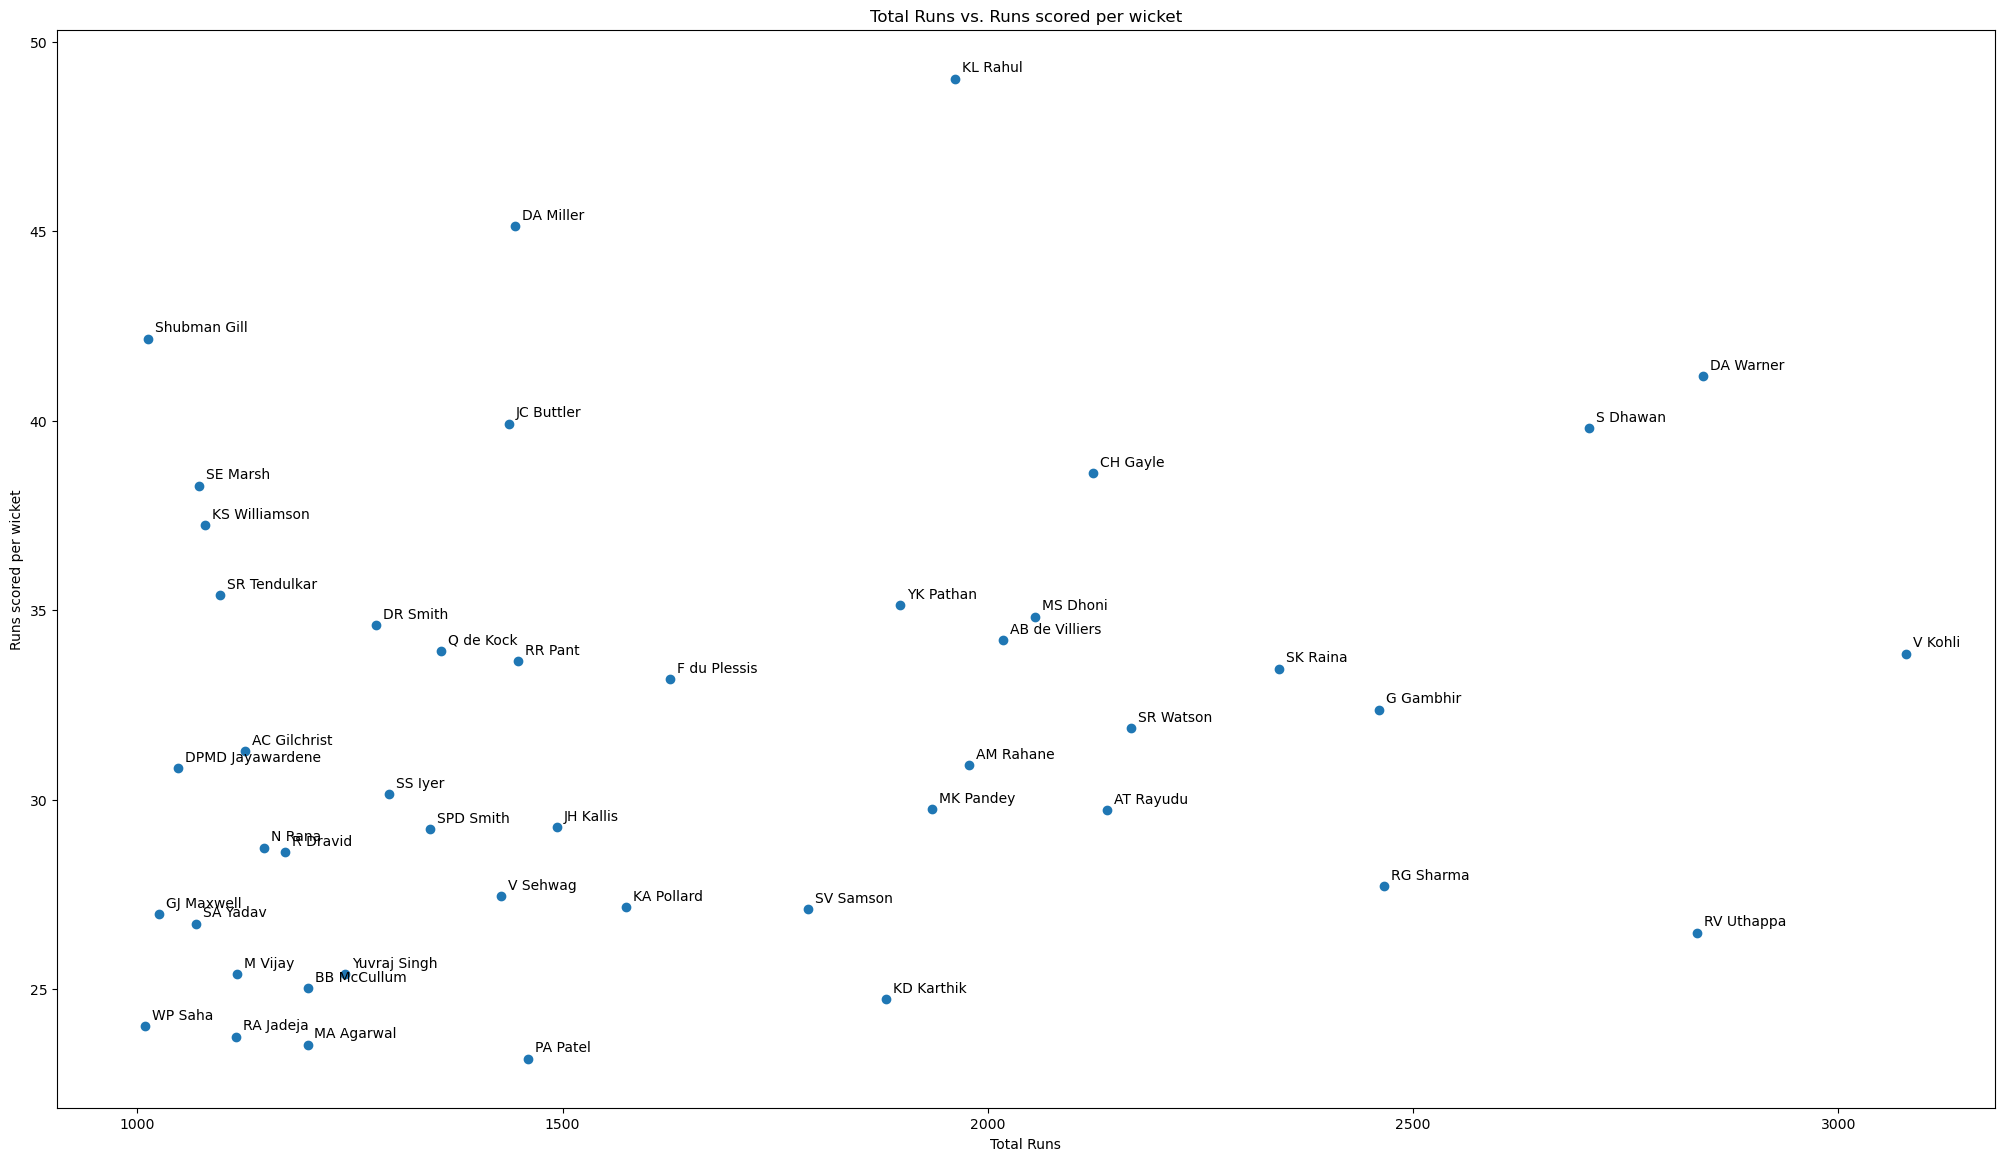

In [170]:
fig, ax = plt.subplots(figsize=(25, 14))
ax.scatter(batsman_stats1['Total Runs'], batsman_stats1['Runs scored per wicket'])

for i, txt in enumerate(batsman_stats1.index):
   ax.annotate(txt, (batsman_stats1['Total Runs'].iloc[i], batsman_stats1['Runs scored per wicket'].iloc[i]), xytext=(5, 5), textcoords='offset points')
ax.set_xlabel('Total Runs')
ax.set_ylabel('Runs scored per wicket')
ax.set_title('Total Runs vs. Runs scored per wicket')
plt.show()


**What stands out about this visualization is that Robin Uthappa has scored the second most runs while chasing yet he isn't a top 5 chaser since he gets out frequently and the reason he has scored a lot would be because of his longetivity.**